In [ ]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 6.5 MB/s eta 0:00:00


In [ ]:
import os
import re
from groq import Groq

os.environ["GROQ_API_KEY"] ="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"

In [ ]:
PROMPT_TEMPLATES = {
    'prompting': lambda task: (
        f"Generate only valid Python code using the TenSEAL library to implement CKKS {task}. "
        f"Import 'tenseal as ts'. Create a CKKS context using:\n"
        f"  ts.context(\n"
        f"    ts.SCHEME_TYPE.CKKS,\n"
        f"    poly_modulus_degree=8192,\n"
        f"    coeff_mod_bit_sizes=[60, 40, 40, 60]\n"
        f"  )\n"
        f"Set 'context.global_scale = 2**40' and call 'context.generate_galois_keys()'. "
        f"Define vectors and encrypt them using 'ts.ckks_vector(context, vec1)'. "
        f"Perform the encrypted {task} operation. Use '.decrypt()' and compute the final result using plaintext operations like 'sum(...)'. "
        f"Only return clean Python code without any explanations, markdown, conditionals, or comments."
    ),

    'decoding': lambda task: (
        f"Generate only valid Python code using TenSEAL to implement CKKS {task}. "
        f"Import 'tenseal as ts'. Create a CKKS context using:\n"
        f"    ts.context(\n"
        f"        ts.SCHEME_TYPE.CKKS,\n"
        f"        poly_modulus_degree=8192,\n"
        f"        coeff_mod_bit_sizes=[60, 40, 40, 60]\n"
        f"    )\n"
        f"Set 'context.global_scale = 2**40' and call 'context.generate_galois_keys()'. "
        f"Define two vectors and encrypt them using 'ts.ckks_vector(context, vec1)'. "
        f"Perform the encrypted {task} operation. Use '.decrypt()' and compute the final result using plaintext operations like 'sum(...)'."
        f"Print the final result using print(). Output only raw Python code."
    ),

    'self_improvement': lambda task: (
        f"The previous output was incorrect. Retry and return only correct Python code using TenSEAL for CKKS {task}. "
        f"Import 'tenseal as ts'. Create a CKKS context using:\n"
        f"    ts.context(\n"
        f"        ts.SCHEME_TYPE.CKKS,\n"
        f"        poly_modulus_degree=8192,\n"
        f"        coeff_mod_bit_sizes=[60, 40, 40, 60]\n"
        f"    )\n"
        f"Set 'context.global_scale = 2**40' and call 'context.generate_galois_keys()'. "
        f"Define two vectors and encrypt them using 'ts.ckks_vector(context, vec1)'. "
        f"Perform the encrypted {task} operation, decrypt the result, and print the final output with print(). "
        f"Output only the raw Python code, with no explanations, markdown, or comments."
    ),

    'rag': lambda task: (
        f"Based on TenSEAL CKKS usage, write only valid Python code to implement CKKS {task}. "
        f"Import 'tenseal as ts'. Set up the context by calling:\n"
        f"    ts.context(\n"
        f"        ts.SCHEME_TYPE.CKKS,\n"
        f"        poly_modulus_degree=8192,\n"
        f"        coeff_mod_bit_sizes=[60, 40, 40, 60]\n"
        f"    )\n"
        f"Assign 'context.global_scale = 2**40' and call 'context.generate_galois_keys()'. "
        f"Encrypt two vectors using 'ts.ckks_vector(context, vec)', perform the encrypted {task} operation, "
        f"decrypt the result (using .decrypt() and plaintext operations if needed), and print the output with print(). "
        f"Return only valid Python code without any extra text, explanations, or markdown formatting."
    )
}

In [ ]:
client = Groq(api_key=os.environ.get("GROQ_API_KEY"))

def call_groq(prompt, model_id="llama-3.1-8b-instant"):
    """
    Calls Groq's LLM with a given prompt and returns the generated message content.
    """
    try:
        response = client.chat.completions.create(
            model=model_id,
            messages=[
                {"role": "system", "content": "You generate Python code using TenSEAL for CKKS tasks."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.7,
            top_p=0.9
        )
        return response.choices[0].message.content

    except Exception as e:
        print(f"Error calling Groq: {e}")
        return None


In [ ]:
TASKS = ['addition', 'multiplication', 'dot product', 'matrix multiplication', 'convolution']
TECHNIQUES = ['prompting', 'decoding', 'self_improvement', 'rag']

In [ ]:
from tqdm import tqdm

OUTPUT_DIR = "generated_tenseal_codes_refine"
os.makedirs(OUTPUT_DIR, exist_ok=True)

for technique in TECHNIQUES:
    for task in TASKS:
        for i in tqdm(range(5), desc=f"{technique.upper()} - {task.upper()}"):
            prompt = PROMPT_TEMPLATES[technique](task)
            code = call_groq(prompt)  #using Groq SDK now

            subdir = f"{OUTPUT_DIR}/grok/{technique}/{task}"
            os.makedirs(subdir, exist_ok=True)

            filename = f"{subdir}/sample_{i+1}.py"
            with open(filename, "w") as f:
                f.write(code or "# ERROR: No code generated")


RAG - CONVOLUTION: 100%|██████████| 5/5 [00:21<00:00,  4.27s/it]


In [ ]:
import shutil

# Example: Copy evaluation_results.csv to a specific folder in Drive
src = "/content/generated_tenseal_codes_refine"
dst = "/content/drive/MyDrive/Home5/generated_tenseal_codes_refine"


# Remove destination folder if it already exists (optional, to avoid errors)
if os.path.exists(dst):
    shutil.rmtree(dst)

# Copy entire directory
shutil.copytree(src, dst)

print("Folder copied successfully!")



Folder copied successfully!


In [ ]:
import os
import re
import shutil

def extract_python_code(text):
    code_blocks = re.findall(r"```(?:python)?\n(.*?)```", text, re.DOTALL)
    return code_blocks[0] if code_blocks else text

# Original directory with Groq-generated files
INPUT_DIR = "/content/generated_tenseal_codes_refine/grok"

# Output directory in Google Drive
OUTPUT_DIR = "/content/drive/MyDrive/Home5/generated_tenseal_codes/grok"

# Ensure target exists
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Traverse and clean all .py files
for dirpath, _, filenames in os.walk(INPUT_DIR):
    for filename in filenames:
        if filename.endswith(".py"):
            in_file_path = os.path.join(dirpath, filename)

            # Read file
            with open(in_file_path, "r", encoding="utf-8") as f:
                raw_content = f.read()

            # Clean file
            cleaned_code = extract_python_code(raw_content)

            # Build matching output path
            relative_path = os.path.relpath(in_file_path, INPUT_DIR)
            out_file_path = os.path.join(OUTPUT_DIR, relative_path)
            os.makedirs(os.path.dirname(out_file_path), exist_ok=True)

            # Save cleaned file
            with open(out_file_path, "w", encoding="utf-8") as f:
                f.write(cleaned_code)

print("Saved to drive successfully!")


Saved to drive successfully!


In [ ]:
!pip install tenseal

In [ ]:
# Evaluation

import subprocess
import os
from difflib import SequenceMatcher
import torch

class Evaluation:
    def __init__(self):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"

    def check_compilability(self, file_path):
        try:
            subprocess.check_output(["python3", file_path], stderr=subprocess.STDOUT, timeout=10)
            return True
        except subprocess.CalledProcessError:
            return False

    def check_functionality(self, file_path):
        try:
            output = subprocess.check_output(["python3", file_path], stderr=subprocess.STDOUT, timeout=10)
            output = output.decode("utf-8").strip()
            is_functional = any(char.isdigit() for char in output)
            return is_functional, output
        except Exception as e:
            return False, str(e)

    def crystal_bleu(self, generated, reference):
        return SequenceMatcher(None, generated, reference).ratio()


In [ ]:
import csv

codes = "/content/drive/MyDrive/Home5/generated_tenseal_codes/grok"

evaluator = Evaluation()
results = []

for root, _, files in os.walk(codes):
    for file in files:
        if file.endswith(".py"):
            full_path = os.path.join(root, file)

            # Generate index as foldername/filename relative to base path
            relative_path = os.path.relpath(full_path, codes)
            index_name = relative_path.replace("\\", "/")  # ensure cross-platform compatibility

            # Evaluate
            is_compilable = evaluator.check_compilability(full_path)
            is_functional = evaluator.check_functionality(full_path)[0]
            with open(full_path, "r") as f:
                generated_code = f.read()


            results.append({
                "File": index_name,
                "Technique":index_name.split('/')[0],
                "Task":index_name.split('/')[1],
                "Compilability": is_compilable,
                "Functionality": is_functional,
            })

# Write to CSV
output_csv = "/content/drive/MyDrive/Home5/evaluation_results.csv"
with open(output_csv, "w", newline="") as csvfile:
    fieldnames = ["File","Technique", "Task", "Compilability","Functionality"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for row in results:
        writer.writerow(row)

print(f"Results saved to {output_csv}")


Results saved to /content/drive/MyDrive/Home5/evaluation_results.csv


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Home5/evaluation_results.csv")
df

,File,Technique,Task,Compilability,Functionality
0,self_improvement/addition/sample_5.py,self_improvement,addition,True,True
1,self_improvement/addition/sample_1.py,self_improvement,addition,True,True
2,self_improvement/addition/sample_4.py,self_improvement,addition,True,True
3,self_improvement/addition/sample_3.py,self_improvement,addition,True,True
4,self_improvement/addition/sample_2.py,self_improvement,addition,False,False
...,...,...,...,...,...
95,prompting/dot product/sample_5.py,prompting,dot product,True,True
96,prompting/dot product/sample_1.py,prompting,dot product,True,True
97,prompting/dot product/sample_4.py,prompting,dot product,True,True
98,prompting/dot product/sample_3.py,prompting,dot product,False,False


In [ ]:
import pandas as pd
import os
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.tokenize import word_tokenize

# Download required tokenizer
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import pandas as pd
import os
from difflib import SequenceMatcher

df = pd.read_csv("/content/drive/MyDrive/Home5/evaluation_results.csv")

generated_base = "/content/drive/MyDrive/Home5/generated_tenseal_codes/grok"

reference_base = "/content/drive/MyDrive/Home5/reference_codes"

# BLEU smoothing
smoother = SmoothingFunction().method1

# BLEU function
def crystal_bleu(generated_code, reference_code):
    gen_tokens = word_tokenize(generated_code)
    ref_tokens = word_tokenize(reference_code)
    return sentence_bleu([ref_tokens], gen_tokens, smoothing_function=smoother)

ref={"addition":"addition","convolution":"convolution","dot product":"dot_product","matrix multiplication":"matrix_multiplication","multiplication":"multiplication"}
# Store scores
scores = []

for i, row in df.iterrows():
    file_path = os.path.join(generated_base, row["File"])
    task = row["Task"]
    reference_path = os.path.join(reference_base, f"{ref[task]}.py")

    try:
        with open(file_path, "r") as f:
            generated_code = f.read()
        with open(reference_path, "r") as f:
            reference_code = f.read()

        score = crystal_bleu(generated_code, reference_code)
    except Exception as e:
        score = 0.0  # fallback if file not found or error

    scores.append(round(score, 4))

df["CrystalBLEU"] = scores

df.to_csv("/content/drive/MyDrive/Home5/evaluation_results_with_bleu.csv", index=False)
print("CrystalBLEU scores calculated and saved.")


CrystalBLEU scores calculated and saved.


In [ ]:
new_df=pd.read_csv("/content/drive/MyDrive/Home5/evaluation_results_with_bleu.csv")
new_df

,File,Technique,Task,Compilability,Functionality,CrystalBLEU
0,self_improvement/addition/sample_5.py,self_improvement,addition,True,True,0.2732
1,self_improvement/addition/sample_1.py,self_improvement,addition,True,True,0.2591
2,self_improvement/addition/sample_4.py,self_improvement,addition,True,True,0.1559
3,self_improvement/addition/sample_3.py,self_improvement,addition,True,True,0.1748
4,self_improvement/addition/sample_2.py,self_improvement,addition,False,False,0.2810
...,...,...,...,...,...,...
95,prompting/dot product/sample_5.py,prompting,dot product,True,True,0.3941
96,prompting/dot product/sample_1.py,prompting,dot product,True,True,0.3977
97,prompting/dot product/sample_4.py,prompting,dot product,True,True,0.3922
98,prompting/dot product/sample_3.py,prompting,dot product,False,False,0.3629


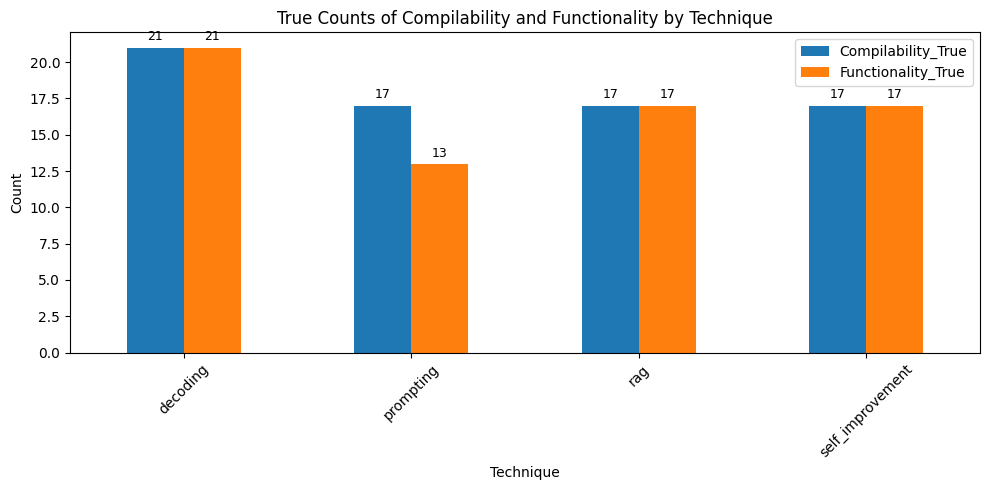

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Technique and count True values
comp_true = new_df[new_df['Compilability'] == True].groupby('Technique').size()
func_true = new_df[new_df['Functionality'] == True].groupby('Technique').size()

# Combine into a single DataFrame
plot_df = pd.DataFrame({
    'Compilability_True': comp_true,
    'Functionality_True': func_true
}).fillna(0).astype(int)

# Plot the bar chart
ax = plot_df.plot(kind='bar', figsize=(10, 5))
plt.title("True Counts of Compilability and Functionality by Technique")
plt.xlabel("Technique")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=3)

plt.show()

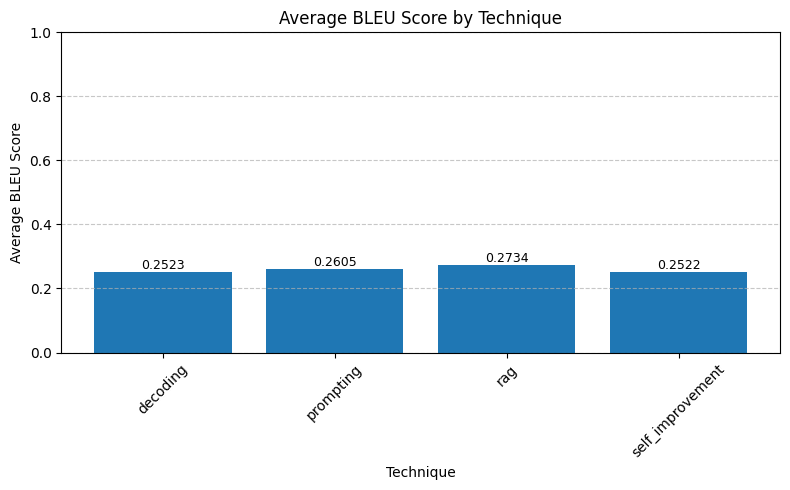

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute average BLEU score per technique
avg_bleu_by_technique = new_df.groupby("Technique")["CrystalBLEU"].mean().round(4)

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(avg_bleu_by_technique.index, avg_bleu_by_technique.values)

# Titles and labels
plt.title("Average BLEU Score by Technique")
plt.xlabel("Technique")
plt.ylabel("Average BLEU Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.4f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()
